In [29]:
import numpy as np
import pandas as pd
from google.colab import drive

In [2]:
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

NumPy 1.21.6
SciPy 1.7.3
Scikit-Learn 1.0.2


In [30]:
drive.mount('/content/MyDrive',force_remount=True)

Mounted at /content/MyDrive


In [31]:
match=pd.read_csv('/content/MyDrive/MyDrive/IPLDataset/matches.csv')
delivery=pd.read_csv('/content/MyDrive/MyDrive/IPLDataset/deliveries.csv')

In [32]:
match.shape

(756, 18)

In [33]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [34]:
delivery.shape

(179078, 21)

In [35]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [36]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [37]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [38]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [39]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [40]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [41]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [42]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [43]:
match_df.shape

(641, 20)

In [44]:
match_df=match_df[match_df['dl_applied']==0]

In [46]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [48]:
delivery_df=match_df.merge(delivery,on='match_id')

In [50]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [52]:
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [54]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [56]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [58]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets']=10-wickets


In [60]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [61]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [62]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [63]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [66]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [67]:
final_df=final_df.sample(final_df.shape[0])

In [68]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
20128,Rajasthan Royals,Chennai Super Kings,Mumbai,137,98,9,163,7.090909,8.387755,1


In [69]:
final_df.dropna(inplace=True)

In [70]:
final_df = final_df[final_df['balls_left'] != 0]

In [71]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [72]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
40989,Rajasthan Royals,Chennai Super Kings,Chennai,240,117,10,246,12.000000,12.307692
4360,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,158,80,8,209,7.650000,11.850000
97607,Kolkata Knight Riders,Chennai Super Kings,Kolkata,83,70,9,154,8.520000,7.114286
58742,Delhi Daredevils,Kolkata Knight Riders,Kolkata,34,68,8,97,7.269231,3.000000
49677,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,117,49,5,175,4.901408,14.326531
...,...,...,...,...,...,...,...,...,...
81356,Chennai Super Kings,Mumbai Indians,Mumbai,107,83,6,139,5.189189,7.734940
48189,Rajasthan Royals,Deccan Chargers,Hyderabad,127,117,10,137,20.000000,6.512821
11693,Delhi Daredevils,Chennai Super Kings,Chennai,143,105,10,169,10.400000,8.171429
103398,Delhi Daredevils,Kings XI Punjab,Pune,58,34,8,165,7.465116,10.235294


In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [75]:
# Random forest gives high accuracy but we need probabilities in real case
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [76]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [77]:
y_pred = pipe.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.799705655617072

In [79]:
pipe.predict_proba(X_test)[10]

array([0.19470607, 0.80529393])

In [80]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [81]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [89]:
# Complete match detail
temp_df,target = match_progression(delivery_df,1,pipe)
temp_df

Target- 207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,0,87.9,12.1
136,2,1,0,91.2,8.8
142,3,16,0,83.5,16.5
148,4,11,0,77.9,22.1
155,5,5,0,78.4,21.6
162,6,10,1,83.6,16.4
168,7,7,1,89.7,10.3
174,8,13,0,84.4,15.6
180,9,10,0,80.2,19.8
187,10,10,0,75.2,24.8


Text(0.5, 1.0, 'Target-178')

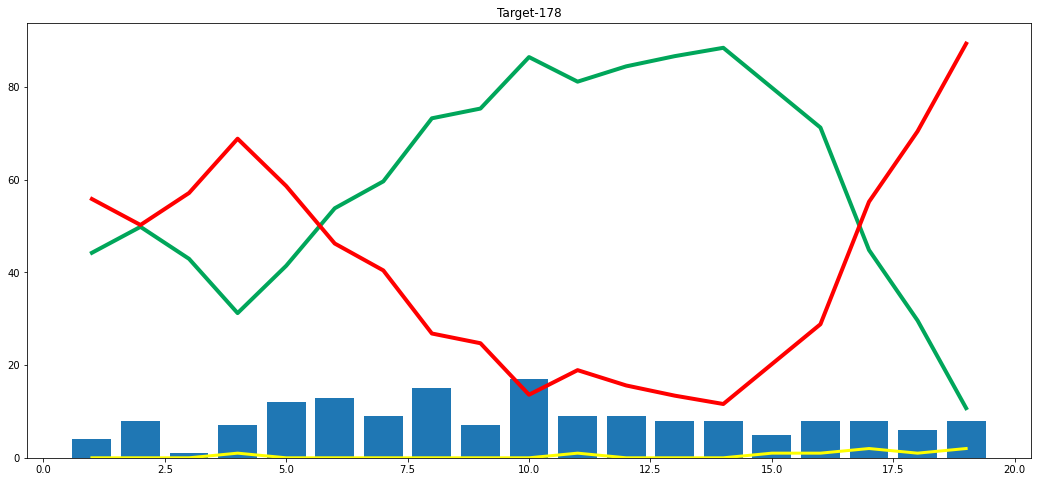

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [84]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [85]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [90]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))